In [1]:
import pandas as pd
import numpy as np
import sklearn.tree
import graphviz
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
!pip install scikeras
import scikeras
from scikeras.wrappers import KerasRegressor
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# Data preprocessing

In [2]:
!mkdir -p data
!wget -P data/ https://raw.githubusercontent.com/Soumadipdas18/CL653_Project/main/data_ml.csv

--2024-04-25 15:00:45--  https://raw.githubusercontent.com/Soumadipdas18/CL653_Project/main/data_ml.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78003 (76K) [text/plain]
Saving to: ‘data/data_ml.csv’

data_ml.csv         100%[===================>]  76.17K  --.-KB/s    in 0.01s   

2024-04-25 15:00:45 (5.32 MB/s) - ‘data/data_ml.csv’ saved [78003/78003]



In [12]:
# Import datset
soumadip_df = pd.read_csv("data/data_ml.csv")
soumadip_df.head()

,F value (min),Quality retention (%),Come-up time (min),Heating time (min),Cooling time (min),Heating retort temperature (degC)
0,816.279553,59.876044,5,19,1,139
1,14.217668,94.183276,4,6,2,131
2,1113.047961,54.213550,5,20,1,140
3,6.955381,96.267563,5,12,5,122
4,1017.976194,56.200988,3,19,4,140


In [13]:
soumadip_df.describe()


,F value (min),Quality retention (%),Come-up time (min),Heating time (min),Cooling time (min),Heating retort temperature (degC)
count,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,130.248748,87.114714,2.971298,12.544419,3.006378,130.069248
std,201.920074,10.037660,1.413439,4.517585,1.412909,6.123519
min,0.326198,54.184604,1.000000,5.000000,1.000000,120.000000
25%,10.773639,82.279466,2.000000,9.000000,2.000000,125.000000
50%,43.498086,90.150439,3.000000,12.000000,3.000000,130.000000
75%,144.645034,95.106315,4.000000,16.000000,4.000000,135.000000
max,1113.047961,98.827754,5.000000,20.000000,5.000000,140.000000


In [14]:
## Data Preprocessing
soumadip_df.isna()
#No null data or outliers
# Scaling of Data
scaler = StandardScaler()
numeric_cols = soumadip_df.columns
soumadip_df[numeric_cols] = scaler.fit_transform(soumadip_df[numeric_cols])
soumadip_df.head()

,F value (min),Quality retention (%),Come-up time (min),Heating time (min),Cooling time (min),Heating retort temperature (degC)
0,3.398311,-2.714266,1.435622,1.429315,-1.420357,1.458767
1,-0.574770,0.704365,0.727967,-1.448984,-0.712436,0.152031
2,4.868378,-3.278519,1.435622,1.650722,-1.420357,1.622109
3,-0.610744,0.912059,1.435622,-0.120539,1.411326,-1.318047
4,4.397432,-3.080476,0.020311,1.429315,0.703406,1.622109


# Basic plots

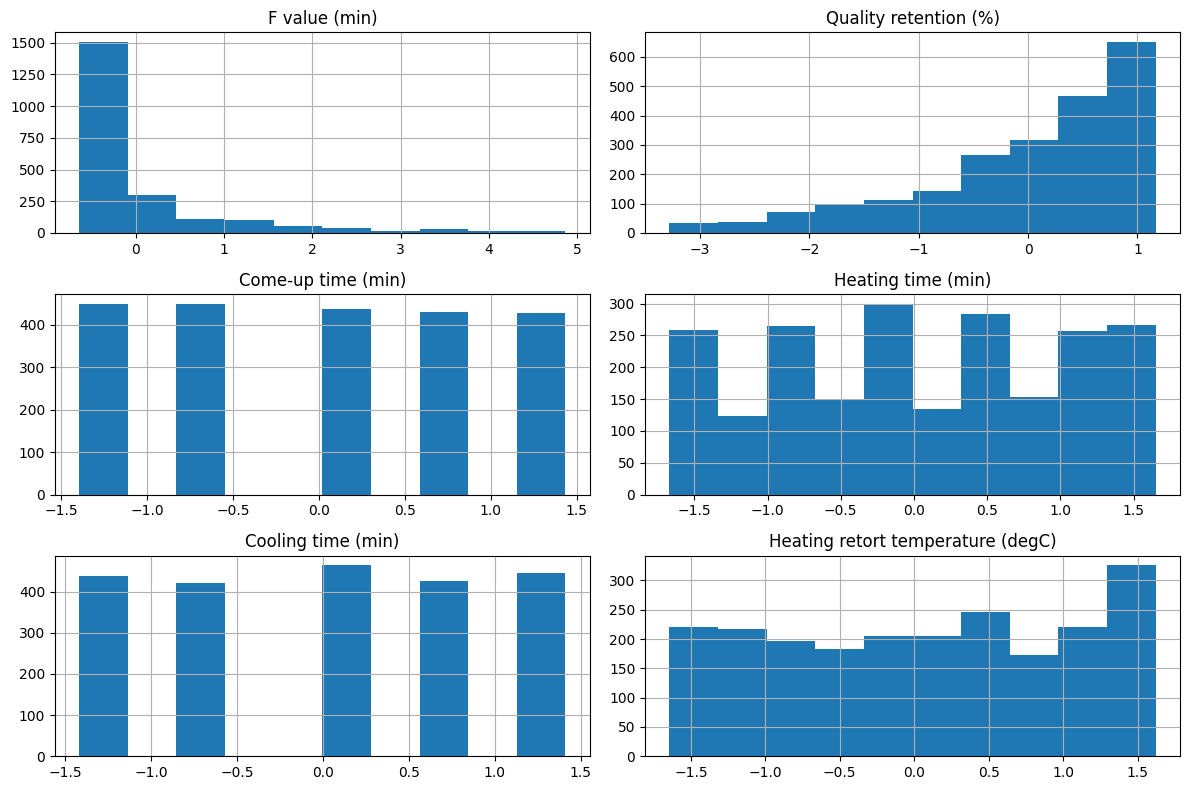

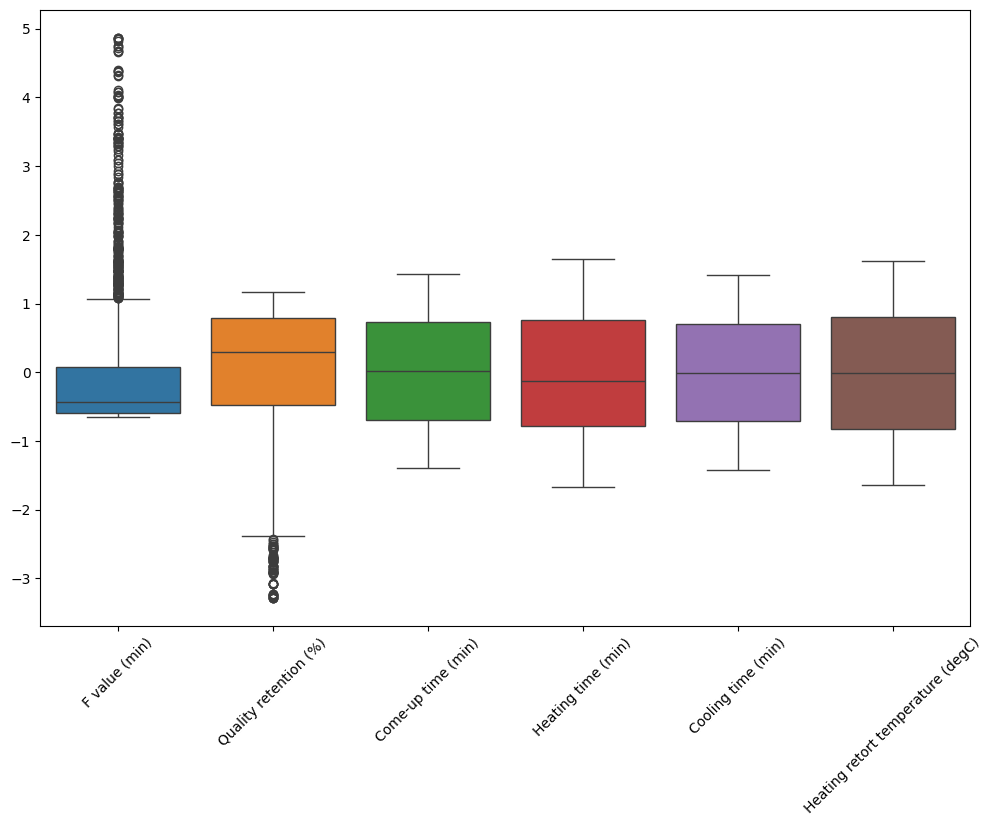

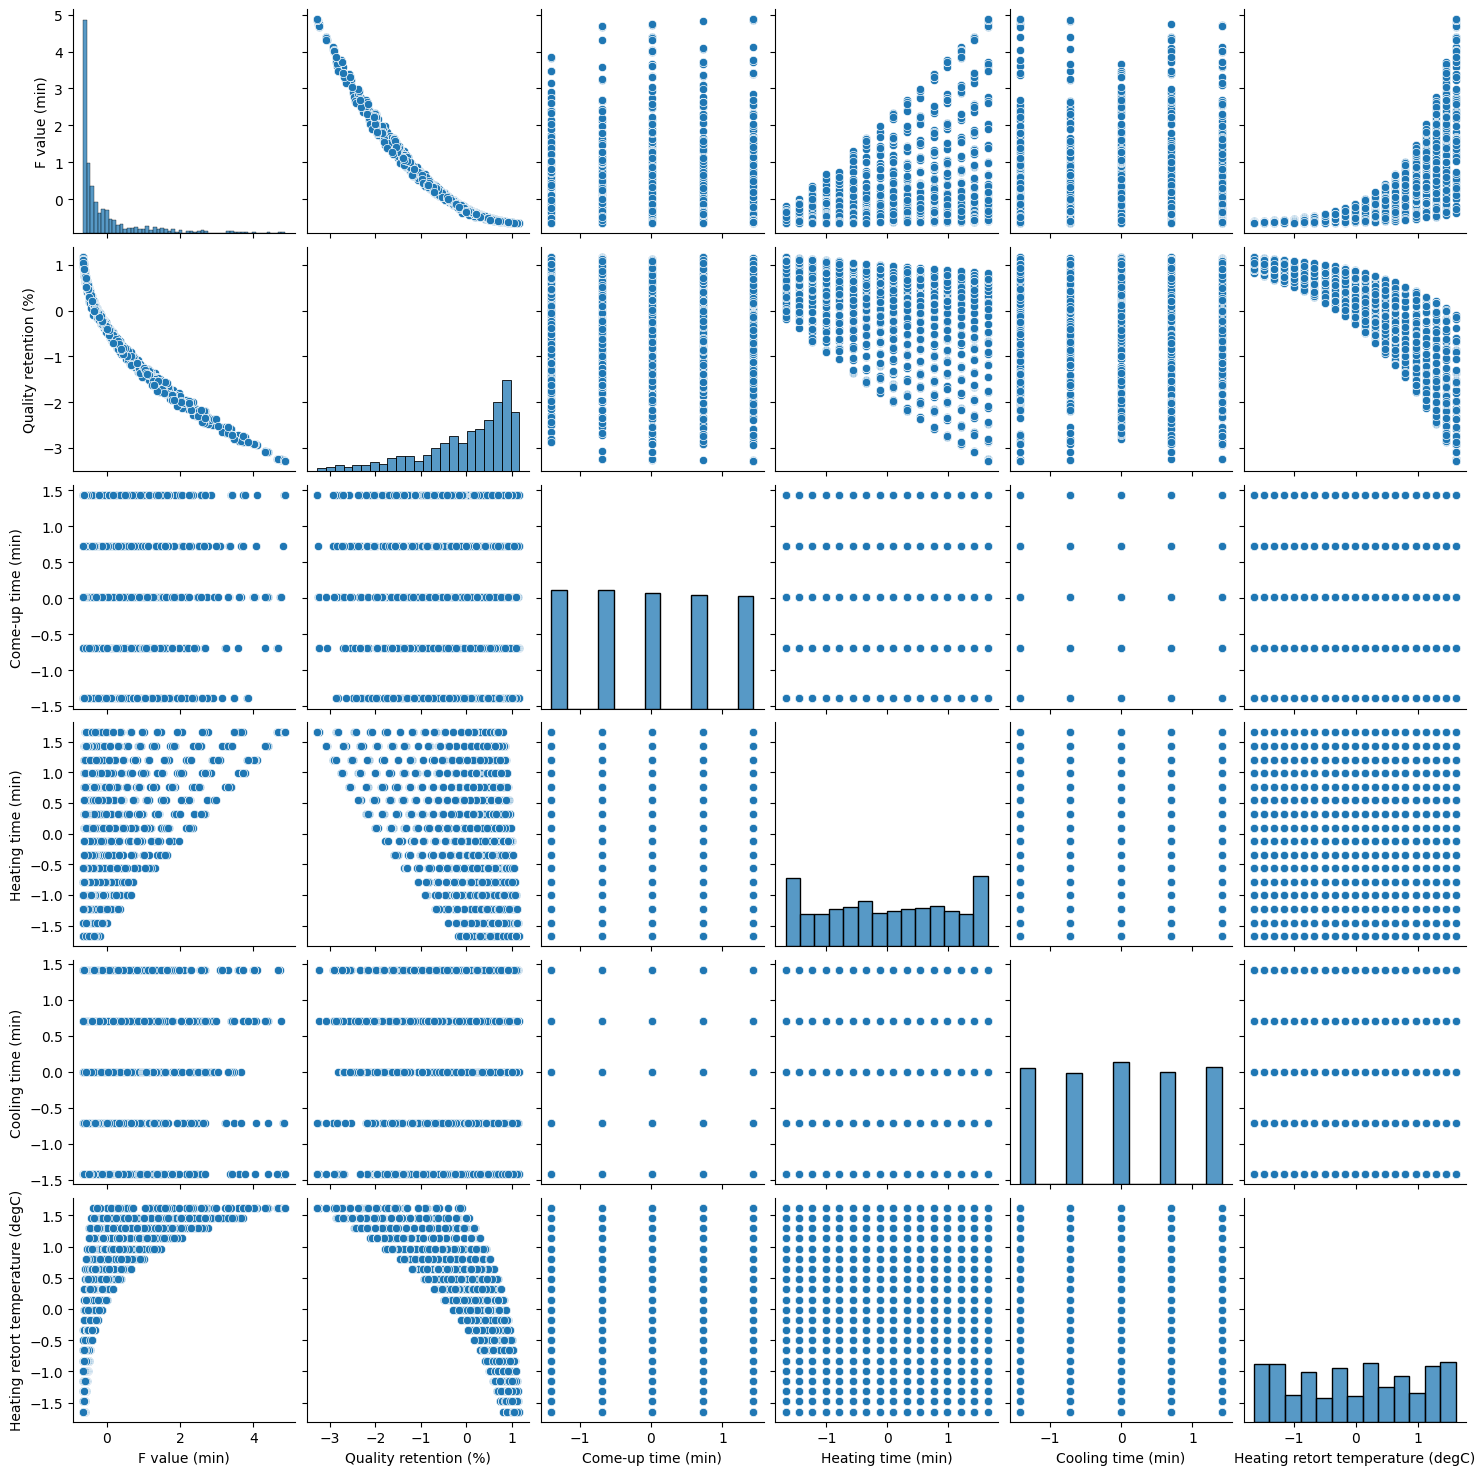

In [15]:
#Basic plots
data=soumadip_df

# Basic plots
# Histograms for each numerical feature
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Box plots for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

# Scatter plots for pairwise feature combinations
sns.pairplot(data)
plt.show()

# Train, test, and split

In [16]:
# Train, test and split
target_f_value = soumadip_df["F value (min)"]
target_quality_retention = soumadip_df["Quality retention (%)"]
features = soumadip_df.drop(columns=["F value (min)", "Quality retention (%)"])

X_train, X_test, y_train_f_value, y_test_f_value = train_test_split(features, target_f_value, test_size=0.2, random_state=7085)
X_train, X_test, y_train_quality, y_test_quality = train_test_split(features, target_quality_retention, test_size=0.2, random_state=7085)

# Linear Regression Model

In [17]:
# the Linear regression model
model_f_value = LinearRegression()
model_quality = LinearRegression()

model_f_value.fit(X_train, y_train_f_value)
model_quality.fit(X_train, y_train_quality)
predictions_f_value = model_f_value.predict(X_test)
predictions_quality = model_quality.predict(X_test)
mse_f_value = mean_squared_error(y_test_f_value, predictions_f_value)
mse_quality = mean_squared_error(y_test_quality, predictions_quality)

print("Mean Squared Error (F value):", mse_f_value)
print("Mean Squared Error (Quality retention):", mse_quality)

Mean Squared Error (F value): 0.39350505347796855
Mean Squared Error (Quality retention): 0.13146654289774687


In [18]:
# Calculate R2 scores
r2_f_value = r2_score(y_test_f_value, predictions_f_value)
r2_quality = r2_score(y_test_quality, predictions_quality)

print("R2 Score (F value):", r2_f_value)
print("R2 Score (Quality retention):", r2_quality)

R2 Score (F value): 0.6226765768195955
R2 Score (Quality retention): 0.8707630286457853


In [19]:
# Perform cross-validation
cv_scores_f_value = cross_val_score(model_f_value, features, target_f_value, cv=5, scoring='r2')
cv_scores_quality = cross_val_score(model_quality, features, target_quality_retention, cv=5, scoring='r2')

print("Cross-Validation R2 Scores (F value):", cv_scores_f_value)
print("Cross-Validation R2 Scores (Quality retention):", cv_scores_quality)

# Print mean and standard deviation of cross-validation scores
print("Mean Cross-Validation R2 Score (F value):", np.mean(cv_scores_f_value))
print("Standard Deviation of Cross-Validation R2 Score (F value):", np.std(cv_scores_f_value))
print("Mean Cross-Validation R2 Score (Quality retention):", np.mean(cv_scores_quality))
print("Standard Deviation of Cross-Validation R2 Score (Quality retention):", np.std(cv_scores_quality))

Cross-Validation R2 Scores (F value): [0.59773109 0.62640991 0.62323045 0.61903893 0.59990063]
Cross-Validation R2 Scores (Quality retention): [0.87146878 0.87406194 0.86983964 0.87684776 0.86745902]
Mean Cross-Validation R2 Score (F value): 0.6132622016139664
Standard Deviation of Cross-Validation R2 Score (F value): 0.01204446708125437
Mean Cross-Validation R2 Score (Quality retention): 0.8719354256370456
Standard Deviation of Cross-Validation R2 Score (Quality retention): 0.0032650053316689224


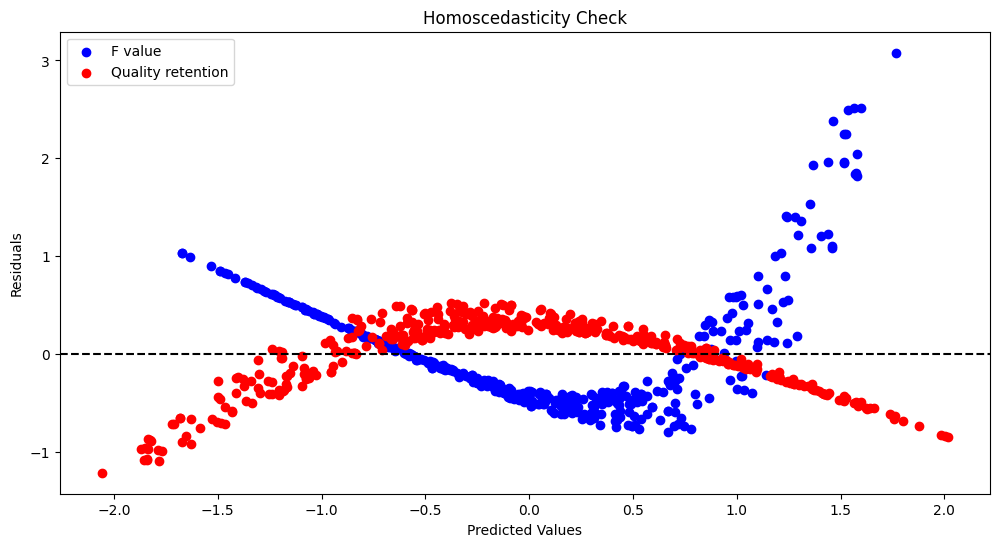

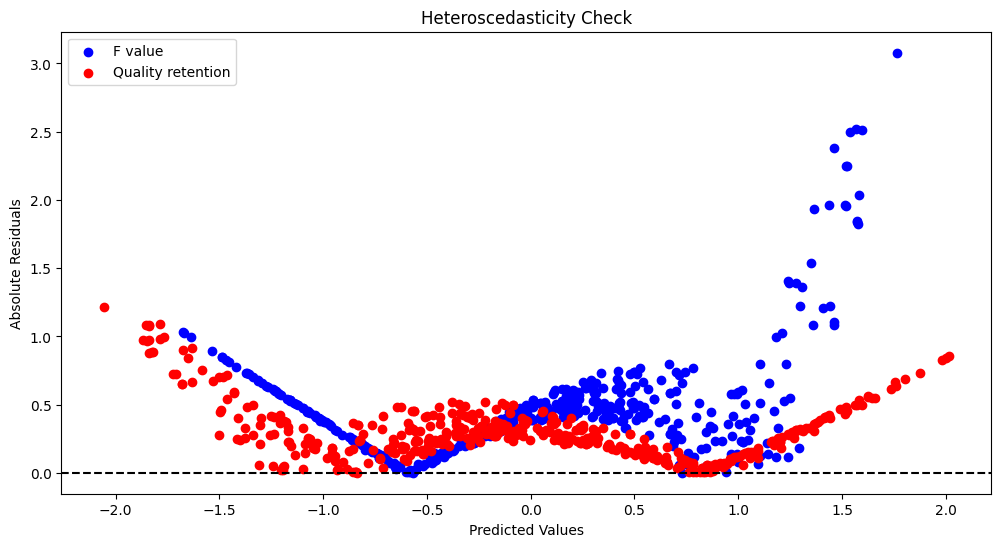

In [20]:
residuals_f_value = y_test_f_value - predictions_f_value
residuals_quality = y_test_quality - predictions_quality

# Homoscedasticity
plt.figure(figsize=(12, 6))
plt.scatter(predictions_f_value, residuals_f_value, label='F value', color='blue')
plt.scatter(predictions_quality, residuals_quality, label='Quality retention', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.legend()
plt.show()

# Heteroscedasticity
plt.figure(figsize=(12, 6))
plt.scatter(predictions_f_value, np.abs(residuals_f_value), label='F value', color='blue')
plt.scatter(predictions_quality, np.abs(residuals_quality), label='Quality retention', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Heteroscedasticity Check')
plt.legend()
plt.show()


# Random Forest Regressor Model

In [23]:
# the Random Forest regression model
model_f_value = RandomForestRegressor(random_state=85)
model_quality = RandomForestRegressor(random_state=85)

model_f_value.fit(X_train, y_train_f_value)
model_quality.fit(X_train, y_train_quality)
predictions_f_value = model_f_value.predict(X_test)
predictions_quality = model_quality.predict(X_test)
mse_f_value = mean_squared_error(y_test_f_value, predictions_f_value)
mse_quality = mean_squared_error(y_test_quality, predictions_quality)

print("Mean Squared Error (F value):", mse_f_value)
print("Mean Squared Error (Quality retention):", mse_quality)


Mean Squared Error (F value): 0.0006088694559117045
Mean Squared Error (Quality retention): 0.00019118635948748387


In [24]:
# Calculate R2 scores
r2_f_value = r2_score(y_test_f_value, predictions_f_value)
r2_quality = r2_score(y_test_quality, predictions_quality)

print("R2 Score (F value):", r2_f_value)
print("R2 Score (Quality retention):", r2_quality)

# Perform cross-validation
cv_scores_f_value = cross_val_score(model_f_value, features, target_f_value, cv=5, scoring='r2')
cv_scores_quality = cross_val_score(model_quality, features, target_quality_retention, cv=5, scoring='r2')

print("Cross-Validation R2 Scores (F value):", cv_scores_f_value)
print("Cross-Validation R2 Scores (Quality retention):", cv_scores_quality)

# Print mean and standard deviation of cross-validation scores
print("Mean Cross-Validation R2 Score (F value):", np.mean(cv_scores_f_value))
print("Standard Deviation of Cross-Validation R2 Score (F value):", np.std(cv_scores_f_value))
print("Mean Cross-Validation R2 Score (Quality retention):", np.mean(cv_scores_quality))
print("Standard Deviation of Cross-Validation R2 Score (Quality retention):", np.std(cv_scores_quality))


R2 Score (F value): 0.9994161683430898
R2 Score (Quality retention): 0.9998120560142544
Cross-Validation R2 Scores (F value): [0.99964609 0.99936063 0.99877663 0.99919765 0.99976843]
Cross-Validation R2 Scores (Quality retention): [0.99985365 0.9998092  0.99963089 0.99969444 0.99992751]
Mean Cross-Validation R2 Score (F value): 0.9993498866379674
Standard Deviation of Cross-Validation R2 Score (F value): 0.00035066304261556226
Mean Cross-Validation R2 Score (Quality retention): 0.9997831378303106
Standard Deviation of Cross-Validation R2 Score (Quality retention): 0.00010727734191021787


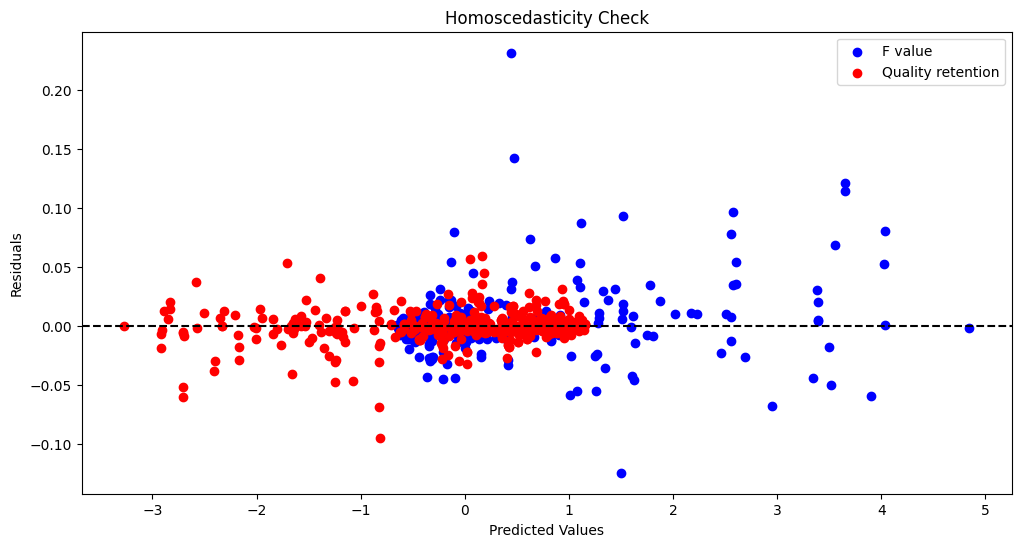

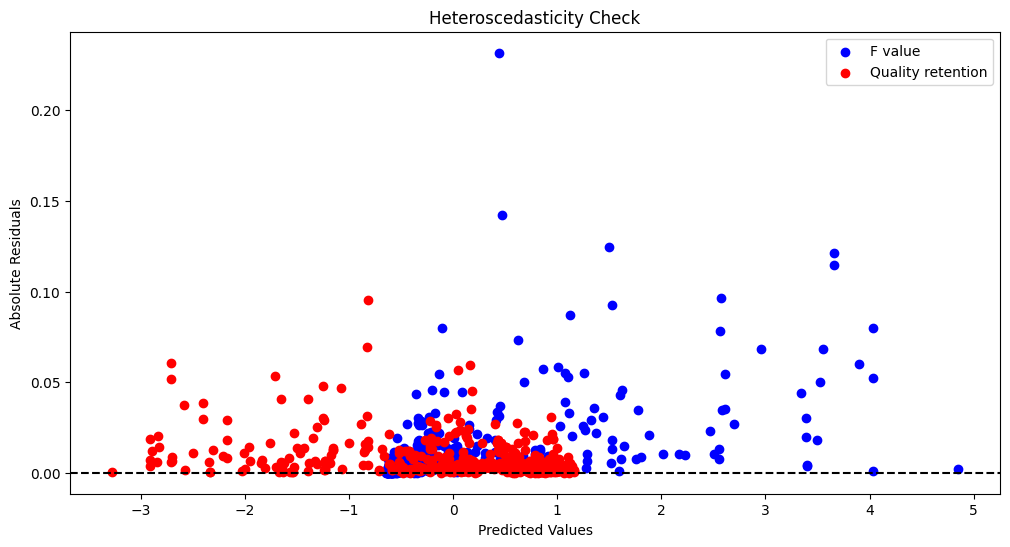

In [26]:
# Residuals
residuals_f_value = y_test_f_value - predictions_f_value
residuals_quality = y_test_quality - predictions_quality

# Homoscedasticity (constant variance)
plt.figure(figsize=(12, 6))
plt.scatter(predictions_f_value, residuals_f_value, label='F value', color='blue')
plt.scatter(predictions_quality, residuals_quality, label='Quality retention', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.legend()
plt.show()

# Heteroscedasticity (non-constant variance)
plt.figure(figsize=(12, 6))
plt.scatter(predictions_f_value, np.abs(residuals_f_value), label='F value', color='blue')
plt.scatter(predictions_quality, np.abs(residuals_quality), label='Quality retention', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Heteroscedasticity Check')
plt.legend()
plt.show()


## Hyperparameter tuning

In [27]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    # Add more hyperparameters to tune as needed
}

rf_reg_f_value = RandomForestRegressor(random_state=85)
rf_reg_quality = RandomForestRegressor(random_state=85)

grid_search_f_value = GridSearchCV(estimator=rf_reg_f_value, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_quality = GridSearchCV(estimator=rf_reg_quality, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_f_value.fit(X_train, y_train_f_value)
grid_search_quality.fit(X_train, y_train_quality)

best_params_f_value = grid_search_f_value.best_params_
best_params_quality = grid_search_quality.best_params_


print("Best hyperparameters (F value):", best_params_f_value)
print("Best hyperparameters (Quality retention):", best_params_quality)


Best hyperparameters (F value): {'max_depth': 10, 'n_estimators': 100}
Best hyperparameters (Quality retention): {'max_depth': None, 'n_estimators': 150}


In [28]:
# R2 score with best parameter

best_estimator_f_value = grid_search_f_value.best_estimator_
best_estimator_quality = grid_search_quality.best_estimator_

predictions_f_value_best = best_estimator_f_value.predict(X_test)
predictions_quality_best = best_estimator_quality.predict(X_test)

r2_f_value_best = r2_score(y_test_f_value, predictions_f_value_best)
r2_quality_best = r2_score(y_test_quality, predictions_quality_best)

print("R2 Score with Best Hyperparameters (F value):", r2_f_value_best)
print("R2 Score with Best Hyperparameters (Quality retention):", r2_quality_best)


R2 Score with Best Hyperparameters (F value): 0.9994076425815094
R2 Score with Best Hyperparameters (Quality retention): 0.9998127486104775


# Neural network regression

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

model_f_value = create_model()
model_quality = create_model()
history_f_value = model_f_value.fit(X_train_scaled, y_train_f_value, epochs=100, validation_split=0.2, verbose=0)
history_quality = model_quality.fit(X_train_scaled, y_train_quality, epochs=100, validation_split=0.2, verbose=0)
mse_f_value = model_f_value.evaluate(X_test_scaled, y_test_f_value)[0]
mse_quality = model_quality.evaluate(X_test_scaled, y_test_quality)[0]

print("Mean Squared Error (F value):", mse_f_value)
print("Mean Squared Error (Quality retention):", mse_quality)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - mse: 0.0010  
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6440e-04 - mse: 3.6440e-04  
Mean Squared Error (F value): 0.001073296181857586
Mean Squared Error (Quality retention): 0.0003651189326774329


In [30]:
# R2 scores
predictions_f_value = model_f_value.predict(X_test_scaled)
predictions_quality = model_quality.predict(X_test_scaled)
r2_f_value = r2_score(y_test_f_value, predictions_f_value)
r2_quality = r2_score(y_test_quality, predictions_quality)

print("R2 Score (F value):", r2_f_value)
print("R2 Score (Quality retention):", r2_quality)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R2 Score (F value): 0.9989708397795514
R2 Score (Quality retention): 0.9996410731940575


In [32]:
# Cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=85)
cv_scores_f_value = []
cv_scores_quality = []

for train_index, test_index in kf.split(features):
    X_train_cv, X_test_cv = features.iloc[train_index], features.iloc[test_index]
    y_train_f_value_cv, y_test_f_value_cv = target_f_value.iloc[train_index], target_f_value.iloc[test_index]
    y_train_quality_cv, y_test_quality_cv = target_quality_retention.iloc[train_index], target_quality_retention.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled_cv = scaler.fit_transform(X_train_cv)
    X_test_scaled_cv = scaler.transform(X_test_cv)

    model_f_value.fit(X_train_scaled_cv, y_train_f_value_cv)
    model_quality.fit(X_train_scaled_cv, y_train_quality_cv)

    y_pred_f_value_cv = model_f_value.predict(X_test_scaled_cv)
    y_pred_quality_cv = model_quality.predict(X_test_scaled_cv)

    cv_scores_f_value.append(r2_score(y_test_f_value_cv, y_pred_f_value_cv))
    cv_scores_quality.append(r2_score(y_test_quality_cv, y_pred_quality_cv))

mean_cv_r2_f_value = np.mean(cv_scores_f_value)
std_cv_r2_f_value = np.std(cv_scores_f_value)
mean_cv_r2_quality = np.mean(cv_scores_quality)
std_cv_r2_quality = np.std(cv_scores_quality)

print("Cross-Validation R2 Scores (F value):", cv_scores_f_value)
print("Mean Cross-Validation R2 Score (F value):", mean_cv_r2_f_value)
print("Standard Deviation of Cross-Validation R2 Score (F value):", std_cv_r2_f_value)

print("Cross-Validation R2 Scores (Quality retention):", cv_scores_quality)
print("Mean Cross-Validation R2 Score (Quality retention):", mean_cv_r2_quality)
print("Standard Deviation of Cross-Validation R2 Score (Quality retention):", std_cv_r2_quality)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mse: 0.0028
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2931e-04 - mse: 4.2931e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6697e-04 - mse: 6.6697e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3259e-04 - mse: 3.3259e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3155e-04 - mse: 7.3155e-04
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8572e-04 - mse: 3.8572e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mse: 0.0011
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6861e-04 - mse: 8.6861e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mse: 0.0018
55/55 ━━━━━━━━━━━━━━━

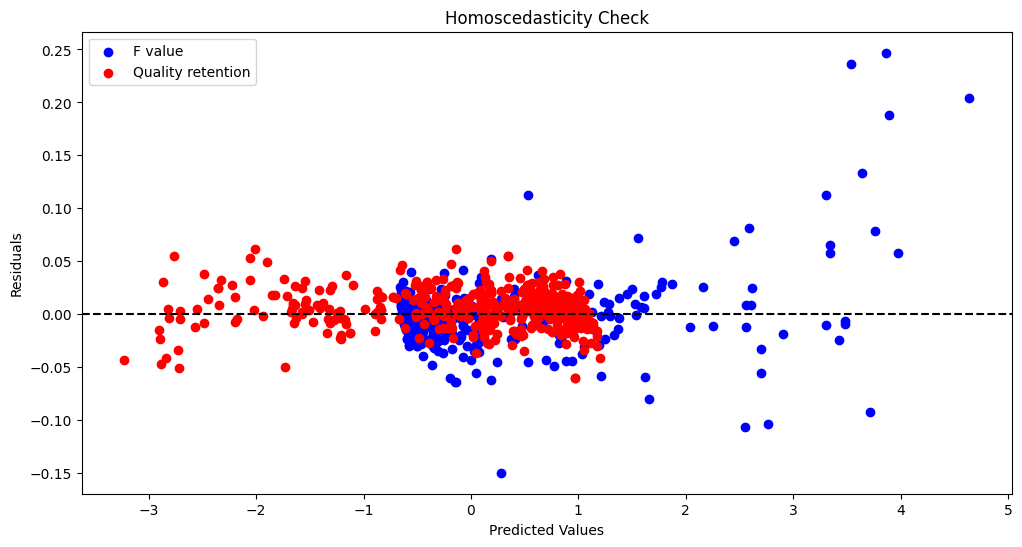

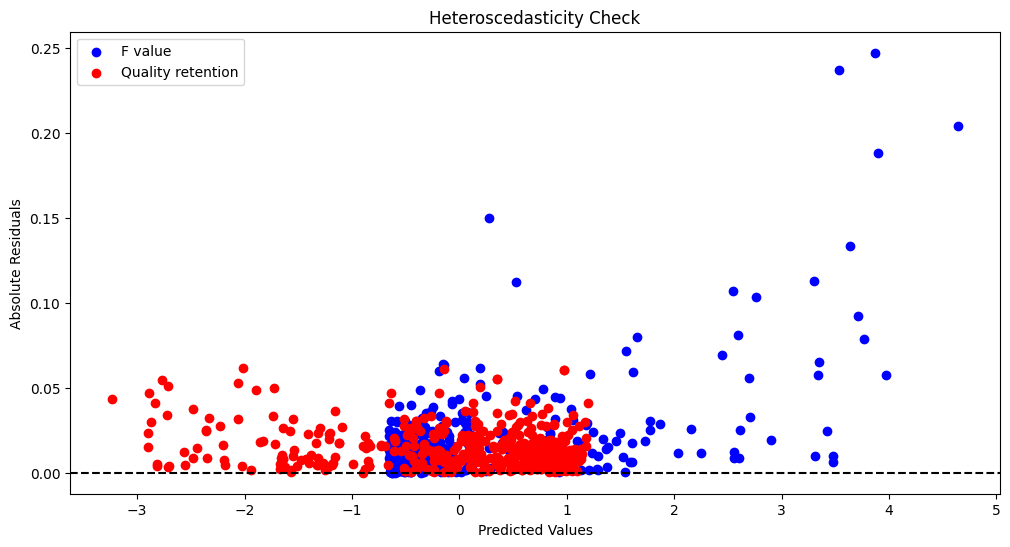

In [34]:
# Residuals
residuals_f_value = y_test_f_value - predictions_f_value.ravel()
residuals_quality = y_test_quality - predictions_quality.ravel()

# Homoscedasticity
plt.figure(figsize=(12, 6))
plt.scatter(predictions_f_value, residuals_f_value, label='F value', color='blue')
plt.scatter(predictions_quality, residuals_quality, label='Quality retention', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.legend()
plt.show()

# Heteroscedasticity
plt.figure(figsize=(12, 6))
plt.scatter(predictions_f_value, np.abs(residuals_f_value), label='F value', color='blue')
plt.scatter(predictions_quality, np.abs(residuals_quality), label='Quality retention', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Heteroscedasticity Check')
plt.legend()
plt.show()